env: sklearn

# <font color = 'purple'> Kernel SVC
Predicting presence of heart disease using a non-linear support vector machine, using kernel methods.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as ms
from sklearn.svm import SVC

import pandas as pd

In [4]:
os.chdir(r"C:\Users\sharo\Documents\Postgrad\My Data Science Portfolio\Classification - Heart Disease")
os.getcwd()

'C:\\Users\\sharo\\Documents\\Postgrad\\My Data Science Portfolio\\Classification - Heart Disease'

In [5]:
sns.set_style('whitegrid')

In [6]:
my_seed = 101

## <font color = 'blue'> Reserve test data
Test data will not be used for model training or hyperparameter tuning, itstead it is reserved for final evaluation of model performance.

In [12]:
def get_train_test_df(fp, label_colname, my_seed=None):
    """
    Function to import raw data, carry out pre-processing, and split into training and test datasets.
    Test data will be reserved for final evaluation of model performance (i.e. not for hyperparameter tuning)
    
    :param fp: filepath
    :param label_colname: name of column containing labels
    :param my_seed: integer to be used to fix random state for train_test_split
    
    :return: tuple of dataframes - training_df, test_df
    """

    # import data
    df = pd.read_csv(fp)

    # one-hot encoding of categorical variables
    df = pd.get_dummies(df, drop_first=True)

    # Standard scaling of features
    scaler = StandardScaler()
    df[df.drop(columns=label_colname).columns] = scaler.fit_transform(df[df.drop(columns=label_colname).columns])


    # separate into training & test datasets. 
    # Stratification is used to ensure training and test sets have representative proportions of all classes
    training_df, test_df = train_test_split(df, test_size=0.2, random_state=my_seed, stratify=df[label_colname])

    return training_df, test_df

In [13]:
training_df, test_df = get_train_test_df(fp = "heart_clean.csv", label_colname='HeartDisease', my_seed = my_seed)

## <font color = 'blue'>Train Model

In [14]:
training_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease,ST_Slope_Flat,ST_Slope_Up,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
414,0.052026,-0.141240,-0.009695,-1.052500,1.981759,1.812470,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,1.213136
6,-0.902124,-0.141240,-0.140981,1.304764,-0.831502,-0.551733,0,-1.001091,1.149573,-1.936826,2.073784,-0.531524,-0.22981,0.815013,-0.490781,-0.824310
529,-0.372041,0.025520,-0.497329,-0.345321,0.200027,-0.551733,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,1.213136
225,-0.372041,0.692560,0.365409,0.519009,-0.831502,-0.551733,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,-0.824310
412,0.264059,-0.419173,-0.009695,-1.327514,0.106251,1.812470,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,1.213136


In [15]:
X_train = training_df.drop(columns = 'HeartDisease').to_numpy()
X_train.shape

(733, 15)

In [16]:
y_train = training_df['HeartDisease'].to_numpy()
y_train.shape

(733,)

### Hyperparameter Tuning through Cross Validation

In [17]:
parameters = [{'kernel':['poly'], 'C':[0.01, 0.1, 1, 10, 100], 'degree':[2,3]},
              {'kernel':['rbf'], 'C':[0.01, 0.1, 1, 10, 100]}]
clf = ms.GridSearchCV(SVC(), parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}])

In [19]:
df_cvresults = pd.DataFrame.from_dict(clf.cv_results_)
df_cvresults[['param_kernel', 'param_C', 'param_degree', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_kernel,param_C,param_degree,mean_test_score,std_test_score,rank_test_score
12,rbf,1,NaN,0.849977,0.022084,1
5,poly,1,3,0.849967,0.013245,2
11,rbf,0.1,NaN,0.847228,0.024876,3
3,poly,0.1,3,0.837629,0.029511,4
13,rbf,10,NaN,0.832224,0.020237,5
6,poly,10,2,0.815935,0.041604,6
8,poly,100,2,0.811798,0.022534,7
14,rbf,100,NaN,0.802264,0.033751,8
4,poly,1,2,0.798155,0.030325,9
7,poly,10,3,0.796766,0.034836,10


Limit search to rby and deg-3 polynomial, C between 0.1 and 10

In [23]:
len(np.arange(0.1, 10.01, 0.02))

496

In [24]:
parameters = [{'kernel':['poly'], 'C':np.arange(0.1, 10.01, 0.02), 'degree':[3]},
              {'kernel':['rbf'], 'C':np.arange(0.1, 10.01, 0.02)}]
clf = ms.GridSearchCV(SVC(), parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([ 0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,
        0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,
        0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,
        0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,
        0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98,
        1.  ,  1.02,  1.04,  1.06,  1.08,  1.1 ,  1.12,  1.14,  1.16,
        1.18,  1.2 ,  1.22,  1.24,  1.26,  1.28,  1.3 ,  1.32,  1...
        8.56,  8.58,  8.6 ,  8.62,  8.64,  8.66,  8.68,  8.7 ,  8.72,
        8.74,  8.76,  8.78,  8.8 ,  8.82,  8.84,  8.86,  8.88,  8.9 ,
        8.92,  8.94,  8.96,  8.98,  9.  ,  9.02,  9.04,  9.06,  9.08,
        9.1 ,  9.12,  9.14,  9.16,  9.18,  9.2 ,  9.22,  9.24,  9.26,
        9.28,  9.3 ,  9.32,  9.34,  9.36,  9.38,  9.4 ,  9.42,  9.44,
        9.46,  9.48,  9.5 ,  9.52,  9.54,  9.56,  9.58,  9.6 ,  9.62,
        9.64,  9.66,  9.68,  9.7 ,  9.72,  9.74,  9.76,  9.78,  9.8 ,
        9.82,  9.84,  9.86,  9.88,  9.9 ,  9.92,  9.94,  9.96,  9.98,
       10.  ]),
                          'kernel': ['rbf']}])

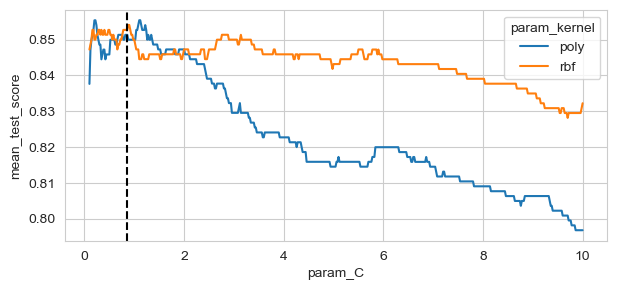

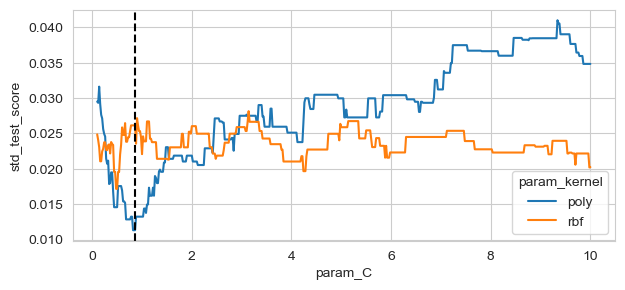

In [29]:
results = pd.DataFrame.from_dict(clf.cv_results_)[['param_kernel', 'param_C', 'param_degree', 'mean_test_score', 'std_test_score', 'rank_test_score']]

fig, ax = plt.subplots(figsize=(7,3))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_kernel', ax=ax, errorbar=None)
ax.axvline(0.85, color='black', linestyle='dashed')

fig, ax = plt.subplots(figsize=(7,3))
sns.lineplot(data=results, x='param_C', y='std_test_score', hue='param_kernel', ax=ax, errorbar=None)
ax.axvline(0.85, color='black', linestyle='dashed')

Both poly and rbf achieve similar mean accuracy, but poly has lower variance. Select this.
kernel=poly, degree=3, C=0.85

### Train Final Model

In [30]:
svc_final = SVC(kernel='poly', degree=3, C=0.85)
svc_final.fit(X_train, y_train)

SVC(C=0.85, kernel='poly')

In [31]:
#check training accuracy
print(f"Mean Training Accuracy = {round(svc_final.score(X_train, y_train)*100,2)}%")

Mean Training Accuracy = 91.0%


## <font color='blue'> Test

In [32]:
X_test = test_df.drop(columns = 'HeartDisease').to_numpy()
X_test.shape

(184, 15)

In [33]:
y_test = test_df['HeartDisease'].to_numpy()
y_test.shape

(184,)

In [34]:
#check test accuracy
print(f"Mean Test Accuracy = {round(svc_final.score(X_test, y_test)*100,2)}%")

Mean Test Accuracy = 88.04%
